<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png"
         width="500" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>
            Chair of Soil Mechanics and Foundation Engineering<br>
            Geotechnical Institute<br>
            Technische Universität Bergakademie Freiberg.
        </p>
        <p>
            <a href="https://tu-freiberg.de/en/soilmechanics">
                https://tu-freiberg.de/en/soilmechanics
            </a>
        </p>
    </div>
</div>

<div style="display: flex; align-items: center;">
    <p style="margin-top: 1em;">
        To activate the <strong>interactive features</strong> when in nbviewer mode, click on &quot;Execute on Binder&quot;
        <img src="https://mybinder.org/static/favicon.ico"
             alt="Binder"
             style="height: 1.1em; vertical-align: middle; margin: 0 6px;">
        on the top right. Then, click on Run → Run All Cells.
    </p>
</div>


# Pfade mechanischer Raumwellen und die terrestrische Brachistochrone

Ergänzendes Material zum Artikel:

Kern, D., & Nagel, T. (2022). An experimental numerics approach to the terrestrial brachistochrone. GAMM Archive for Students, 4(1). https://doi.org/10.14464/gammas.v4i1.512

Das Fermatsche Prinzip besagt, dass sich Licht, im Allgemeinen Wellen, auf dem Weg der kürzesten Laufzeit ausbreiten. 
Für die Ausbreitungsgeschwindigkeit von P- und S-Wellen in elastischen Medien gilt
$c_\mathrm{P}, c_\mathrm{S} \propto \sqrt{\mu}$, wobei $\mu$ für den Schubmodul steht.

In [16]:
from IPython.display import display, Math, Latex
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import plot_functions.plot_settings

## Vorbetrachtung in kartesischen Koordinaten (klassisches Brachistrochronenproblem)

Herleitung nach [Mark Levi: Classical Mechanics with Calculus of Variations and Optimal Control](https://www.google.de/books/edition/_/uVSYswEACAAJ?hl=de&sa=X&ved=2ahUKEwiE_I3G-ofyAhUBD-wKHdOeClUQ8fIDMBF6BAgIEAM) chapter 5.5

Für den tiefenabhängigen Schubmodul wird in kartesischen Koordinaten oft die Näherung 
$\mu \propto p \propto z$
verwendet. Somit gilt $c \propto \sqrt{z}$.
Damit ist die Bahnberechnung mathematisch äquivalent zur Brachistochrone, denn für die Geschwindigkeit eines Massenpunkts im Gravitationsfeld gilt in kartesischen Koordinaten ebenfalls 
$v\propto \sqrt{z}$. 
Die Lösung des klassischen Brachistrochronenproblems ist eine Zykloide, die Rollkurve eines Kreises entlang einer Geraden, wie wir im Folgenden rekapitulieren wollen.

Aus der Energieerhaltung eines Massenpunktes im Schwerefeld folgt seine Geschwindigkeit
\begin{equation}
v = \sqrt{2g y},
\end{equation}
wobei die $y$-Koordinate abwärts gerichtet sei.

Die Zeit, um einen bestimmten Weg zurückzulegen, berechnet sich
\begin{equation}
T = \int_\mathrm{A}^\mathrm{B} \frac{\mathrm{d}s}{v}  = \int_\mathrm{A}^\mathrm{B} \frac{\mathrm{d}s}{\sqrt{2gy}}.
\end{equation}

Wie im Folgenden gezeigt werden soll besitzen die Extremalen eines Funktionals der Struktur
\begin{equation}
\int_\mathrm{A}^\mathrm{B} F(y)\, \mathrm{d}s = \int_\mathrm{x_A}^\mathrm{x_B} \underbrace{F(y) \sqrt{1+y'^2}}_{L} \mathrm{d}x.
\end{equation}
die Eigenschaft
\begin{equation}
F(y)\sin\alpha = \mathrm{const.}
\end{equation}

Denn gemäß Noethers Theorem folgt aus Integranden der Struktur $L(y,y')$ die Erhaltungsgröße
\begin{equation}
H = y' \frac{\partial L}{\partial y'} - L = \mathrm{const.}.
\end{equation}
Für $L(y,y')=F(y)\sqrt{1+y'^2}$ folgt konkret
\begin{equation}
H = y'F(y)\frac{y'}{\sqrt{1+y'^2}}-F(y)\sqrt{1+y'^2} = -\frac{F(y)}{\sqrt{1+y'^2}}
\end{equation}
und durch Einsetzen von $y'=\frac{\cos\alpha}{\sin\alpha}$, mit Winkel $\alpha$ zur Vertikalen, bestätigen wir die Behauptung.

Im Brachistochronenproblem, nach Ausklammern der Konstanten $1/\sqrt{2g}$, bleibt $F(y)=\frac{1}{\sqrt{y}}$ im Integral und für dessen Extremale gilt
\begin{align}
   \frac{\sin\alpha}{\sqrt{y}} &= \frac{1}{\sqrt{2r}}, \\
   \sqrt{y} &= \sqrt{2r} \sin\alpha.
\end{align}

Wie die Skizze zeigt, beschreibt diese Kurve die Zykloide beim Abrollen eines Kreises mit Durchmesser $2r$ (Geschwindigkeit senkrecht zu Ortsvektor zum Momentanpol, Satz des Thales). 
![classical_brachistochrone.svg](https://github.com/nagelt/soil_dynamics/raw/master/Images/classical_brachistochrone.svg)

Der Durchmesser des abrollenden Kreises ist durch die Start- und Endpunkte der Bahn festgelegt.

## Rechnung in Polarkoordinaten (terrestrische Brachistochrone)

Inspiriert durch [Matthew Van Koevering: Terrestrial Brachistochrone](https://www.youtube.com/watch?v=_KIvpr3X_bU)

Beim Übergang zu Polarkoordinaten (die Erde ist eine Kugel) wird das gleiche Zeitfunktional
\begin{equation}
T=\int_\mathrm{A}^\mathrm{B} \frac{\mathrm{d} s}{v(r)}
\end{equation}
minimiert, aber im Vergleich zu kartesischen Koordinaten mit einem anderen Kurvenelement und anderer tiefenabhängiger Geschwindigkeit
\begin{align}
\mathrm{d} s &= \sqrt{(\mathrm{d} r)^2+(r\mathrm{d}\theta)^2}, \\
v &= C\sqrt{R^2 - r^2},
\end{align}
wobei im Brachistochronenproblem $C=\sqrt{g/R}$ von der Erdbeschleunigung $g$ und Erdradius $R$ abhängt.

Der Integrand des zu minimierenden Funktionals
\begin{equation}
T=\frac{1}{C}\int_{\theta_\mathrm{A}}^{\theta_\mathrm{B}} \underbrace{\sqrt{\frac{ (\mathrm{d} r/\mathrm{d} \theta)^2 +r^2}{R^2-r^2}}}_{L} \mathrm{d} \theta
\end{equation}
ist vom Typ $L(r,r')$. 

**Anmerkung:** Die Geschwindigkeitsabhängigkeit eines Massenpunkts im Innern einer homogenen Kugel ist gleich der einer druckabhängigen Wellengeschwindigkeit, d.h. das Brachistochronenproblem ist mathematisch gleich dem der Ausbreitung seismischer Raumwellen.

Ausgangspunkt ist [Newtons Schalentheorem](https://doi.org/10.1080/07468342.2018.1411655)
\begin{equation}
F_g = \frac{mgr}{R}.
\end{equation}

Zum Massenpunkt gehört die potentielle Energie $V=\frac{1}{2}\frac{mg}{R}r^2$ und ausgehend vom Ruhezustand an der Eroberfläche $r=R$ folgt für die Brachistochrone
\begin{equation}
v(r) = \sqrt{\frac{g}{R}}\sqrt{R^2 - r^2}
\end{equation}

Für die Wellenausbreitung nehmen wir eine konstante Dichte $\rho$ an. Für den tiefenabhängigen hydrostatischen Druck gilt dann mit der Gravitationskonstante $G$
\begin{equation}
p = \int_r^R \frac{4\pi}{3} G \rho^2r\,\mathrm{d}r = \frac{2\pi}{3}G\rho^2(R^2 - r^2)
\end{equation}
Unter Annahme eines linearen Zusammenhangs zwischen Druck und Schubmodul $\mu=\frac{1}{2}C_1 p$ erhalten wir für die Geschwindigkeit der S-Wellen einen anderen konstanten Faktor als im Brachistochronenproblem, aber der gleichen Struktur
\begin{equation}
c_\mathrm{S} = \sqrt{\frac{\mu}{\rho}} = \sqrt{C_1 \frac{\pi}{3}G\rho}\,\sqrt{R^2 - r^2}.
\end{equation}
Die Geschwindigkeit der P-Wellen $c_\mathrm{P}$ unterscheidet sich von $c_\mathrm{S}$ nur um einen konstanten Faktor.

In [17]:
r, rt, r0, R, psi = sp.symbols('r rt r0 R psi')

Wir beginnen mit dem Integranden des Zeitfunktionals, wobei die Konstanten ausgeklammert werden, die Bahn ist von ihnen unabhängig.

In [18]:
L = sp.sqrt((rt**2 + r**2)/(R**2 - r**2))

Anstelle der Euler-Lagrange Gleichung nutzen wir die Erhaltungsgröße $H=r' \frac{\partial L}{\partial r'} - L$ und wählen als Bezugspunkt den tiefsten Punkt der Bahn $r=r_0$ 
mit $r'(r_0)=0$ 

In [19]:
H = sp.simplify( rt*L.diff(rt) - L )
H0 = H.subs([(r, r0), (rt, 0)])
TB_condition = sp.simplify( H - H0 )   # equals zero
display(TB_condition)

(-r**2*sqrt((r**2 + rt**2)/(R**2 - r**2)) + sqrt(r0**2/(R**2 - r0**2))*(r**2 + rt**2))/(r**2 + rt**2)

Durch Umstellen erhalten wir als Extremalbedingung für die Bahn der kürzesten Laufzeit

In [20]:
TB_ode = sp.solve(TB_condition, rt)   # quadratic equation has two solutions
display(sp.simplify(TB_ode[0]))   # backward
display(sp.simplify(TB_ode[1]))   # forward

sqrt(R**2*r**2*(r**2 - r0**2)/(r0**2*(R**2 - r**2)))

-sqrt(R**2*r**2*(r**2 - r0**2)/(r0**2*(R**2 - r**2)))

Formal lässt sich die gewöhnliche Differentialgleichung 
\begin{equation}
r' = \frac{Rr}{r_0}\sqrt{\frac{r^2-r_0^2}{R^2-r^2}}.
\end{equation}
durch Trennung der Variablen und Integration lösen. Weil sich dabei schwierige Integrale anbahnen, versuchen wir sie mit _experimenteller Numerik_ zu untersuchen und aus der numerischen Lösung weitere Einsichten zu gewinnen.

### Numerische Lösung der bahnbestimmenden Differentialgleichung

Bevor wir numerisch integrieren, drei Überlegungen vorab
- aufgrund der Zeitsymmetrie erwarten wir eine symmetrische Bahn, wobei der tiefste Punkt $r=r_0$ in der Mitte liegt.
- für $r_0=0$ erwarten wir eine gerade Linie durch den Erdmittelpunkt und für $0<r_0<R$ eine Winkeldifferenz $0<|\theta_A-\theta_B|<\pi$.
- an der Erdoberfläche $r=R$ wird der Anstieg der Bahn unendlich groß (senkrechter Ein- und Ausstieg)

Differentialgleichung der terrestrischen Brachistochrone

In [21]:
def tb_ode(r, t):   
    if r < Rn:
       dr = (Rn*r/r0n)*np.sqrt((r**2 - r0n**2)/(Rn**2 - r**2))
    else:
       dr = 0   # prevent division by zero at end of path (infinite slope)
    return dr

Zahlenwerte für eine Beispielrechnung (Index n steht für numerisch, um von symbolischer Rechnung zu unterscheiden)

In [22]:
Rn = 1.0   

Maximal möglicher Winkelbereich vom tiefsten Punkt $r=r_0$ zur Oberfläche $r=R$ (die zweite Hälfte folgt durch Spiegelung)

In [23]:
theta_grid = np.linspace(0, np.pi/2,1000)   

Numerische Lösung für verschiedene Tiefen

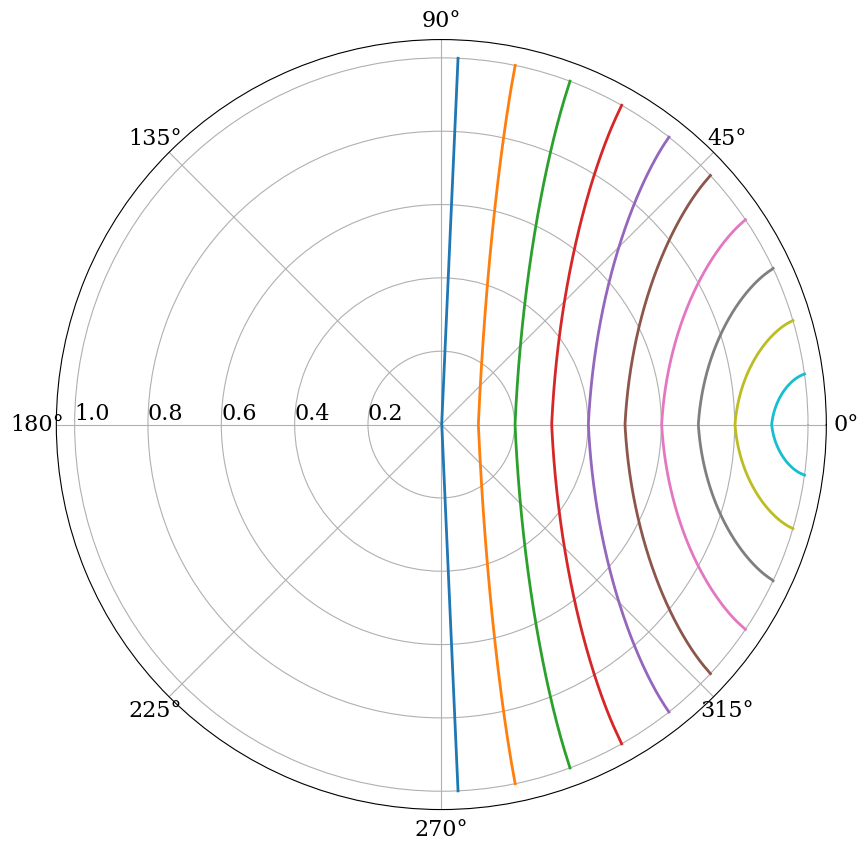

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(10,10))
ax.set_rlabel_position(180) 
for r0n in np.linspace(0.001, 0.9, 10):
    initial_r = 1.001*r0n  # start slightly above r0, otherwise circle (r=r0) results, not reaching the surface
    r_sol = odeint(tb_ode, initial_r, theta_grid) 
    last = np.count_nonzero(r_sol < Rn) + 1  # discard values after reaching the surface
    r_real = r_sol[0:last]
    theta_real = theta_grid[0:last]
    ax.plot(np.concatenate((-np.flip(theta_real), theta_real)), np.concatenate((np.flip(r_real), r_real)))  # symmetry 

### Überprüfen der vermuteten Lösung
![terrestrial_brachistochrone.svg](https://github.com/nagelt/soil_dynamics/raw/master/Images/terrestrial_brachistochrone.svg)

Die numerischen Ergebnisse und der Grenzfall der klassischen Brachistochrone $R=\infty$ legen die Vermutung nahe, dass eine Hypozykloide, das Abrollen eines kleinen Kreises mit Radius $a=\frac{R-r_0}{2}$ auf dem großen Kreis mit Radius $R$, die Lösung sein könnte. Das wollen wir durch symbolische Rechnung überprüfen.

In [25]:
a = (R-r0)/2

Den Zusammenhang zwischen $\psi$ und $\theta$ liefert die Kreisbahn und die gemeinsame Gegenkathete

In [26]:
THETA = (a/R)*psi + sp.atan(a*sp.sin(psi)/(R-a-a*sp.cos(psi)))
d_theta_d_psi_tmp = sp.simplify( THETA.diff(psi) )
display(Math(r'\frac{\mathrm{d} \theta}{\mathrm{d} \psi}=' + sp.latex(d_theta_d_psi_tmp))) 
#print(sp.latex(d_theta_d_psi_tmp))

<IPython.core.display.Math object>

Nun sollen noch $\cos\psi$ und $\sin^2\psi$ durch $r$ ausgedrückt werden, dabei helfen der Kosinussatz und der trigonometrische Pythagoras

In [27]:
cospsi = (R**2 + 2*a**2 - 2*R*a - r**2)/(2*(R-a)*a)
sin2psi = 1-cospsi**2

In [28]:
d_theta_d_psi = sp.simplify( d_theta_d_psi_tmp.subs([ (sp.cos(psi), cospsi), (sp.sin(psi)**2, sin2psi)]) ) 
display(Math(r'\frac{\mathrm{d} \theta}{\mathrm{d} \psi}=' + sp.latex(d_theta_d_psi))) 
#print(sp.latex(d_theta_d_psi))

<IPython.core.display.Math object>

Intuitiv liegt es nahe den Kosinussatz
$r^2 = (R-a)^2 + a^2 - 2(R-a)a\cos\psi$
zu differenzieren, aber dann enthält die Ableitung $\frac{\mathrm{d}r}{\mathrm{d}\psi}$ den Term $\sin\psi$. Das ist ungünstig, weil nur $\cos\psi$ als Funktion von $r$ vorliegt (Kosinussatz). Insgesamt ist es einfacher von dem Halbwinkeltheorem $\tan\frac{\psi}{2}=\sqrt{\frac{1-\cos\psi}{1+\cos\psi}}$ auszugehen, darin den Kosinussatz auszuwerten und dann die Ableitung $\frac{\mathrm{d}\psi}{\mathrm{d}r}$ zu berechnen.

In [29]:
PSI = 2*sp.atan(sp.sqrt((r**2 - r0**2)/(R**2 - r**2)))
d_psi_d_r = sp.simplify( PSI.diff(r) )
display(Math(r'\frac{\mathrm{d} \psi}{\mathrm{d} r}=' + sp.latex(d_psi_d_r)))
#print(sp.latex(d_psi_d_r))

<IPython.core.display.Math object>

Den Ausdruck $r(\theta)$ aufzustellen ist schwierig, aber dessen gesuchte Ableitung erhalten wir durch die Kettenregel $\frac{\mathrm{d}r}{\mathrm{d}\theta} = \frac{\mathrm{d}r}{\mathrm{d}\psi} \frac{\mathrm{d}\psi}{\mathrm{d}\theta}$

In [30]:
d_r_d_theta = sp.simplify( (1/d_psi_d_r)*(1/d_theta_d_psi) )
display(Math(r'\frac{\mathrm{d} r}{\mathrm{d} \theta}=' + sp.latex(d_r_d_theta)))

<IPython.core.display.Math object>

Das ist genau die Extremalbedingung der Laufzeit, die vermutete Lösung erweist sich als korrekt.